## Adaptation trace extingushing

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation
from analysis_functions import calculate_recall_time_quantities, get_weights
from analysis_functions import get_weights_collections
from plotting_functions import plot_network_activity_angle, plot_weight_matrix

## The function

In [5]:
def a_trace(n, Tp, tau_a):
    aux1 = -n * Tp / tau_a 
    aux2 = -Tp / tau_a
    a = np.exp(aux1) * (1 - np.exp(aux2))
    
    return a

In [6]:
n = np.arange(0, 10, 1)
tau_a = 0.150
Tp = 0.100

a = a_trace(n, Tp, tau_a)

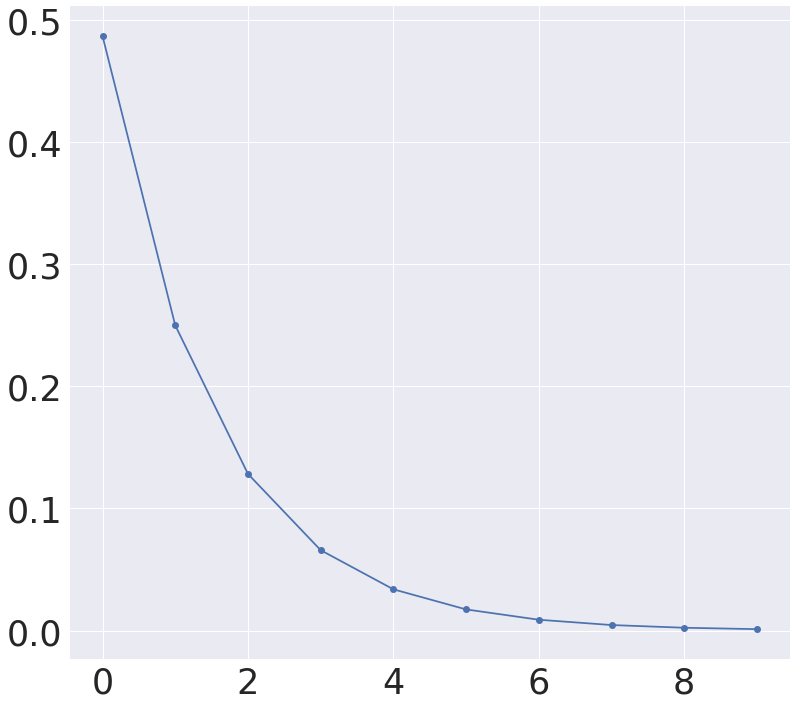

In [7]:
plt.plot(n, a, 'o-')

## Variations on Tp

In [8]:
Tp_list = [0.050, 0.100, 0.200, 0.500]
n = np.arange(0, 10, 1)
tau_a = 0.150
a_list = []

for Tp in Tp_list:
    a_list.append(a_trace(n, Tp, tau_a))

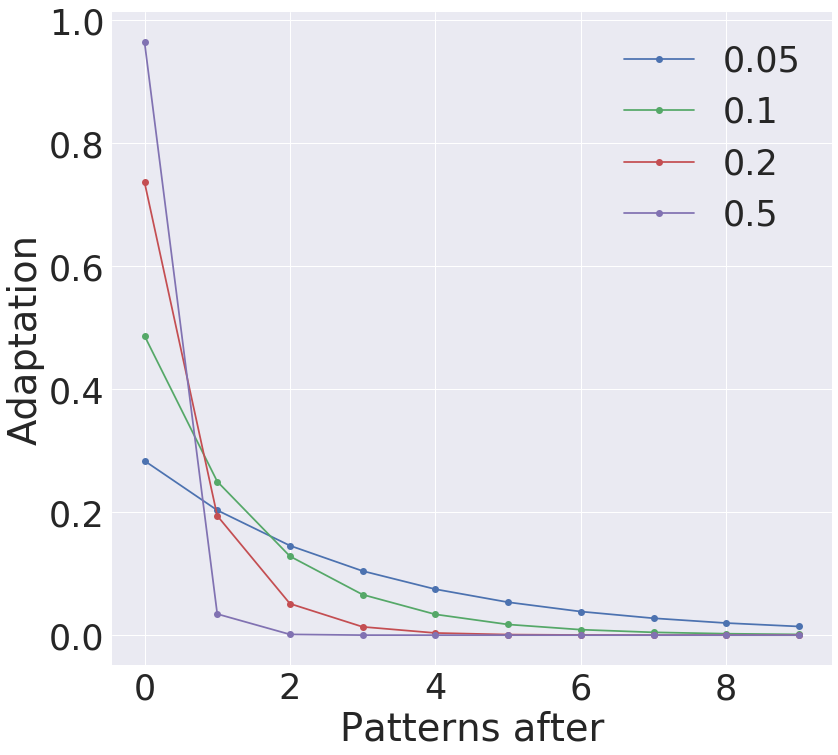

In [10]:
for a, Tp in zip(a_list, Tp_list):
    plt.plot(n, a, 'o-', label=str(Tp))

plt.xlabel('Patterns after')
plt.ylabel('Adaptation')

plt.legend();

## Variation with tau_a

In [12]:
tau_a_list = [0.025, 0.050, 0.100, 0.250, 0.500]
Tp = 0.100
n = np.arange(0, 10, 1)
a_list = []

for tau_a in tau_a_list:
    a_list.append(a_trace(n, Tp, tau_a))

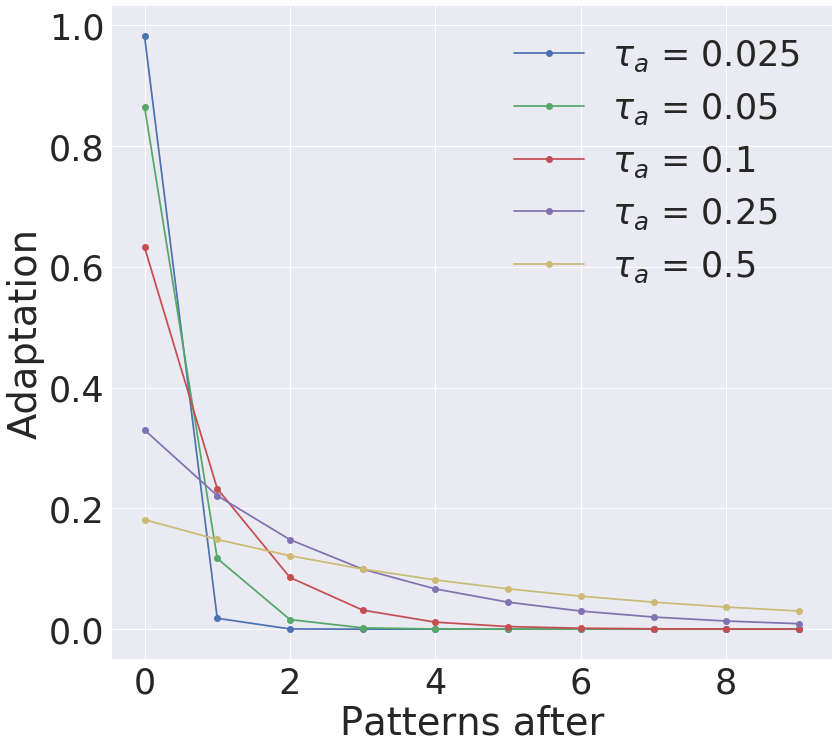

In [15]:
for a, tau_a in zip(a_list, tau_a_list):
    plt.plot(n, a, 'o-', label=r'$\tau_a$ = ' + str(tau_a))

plt.xlabel('Patterns after')
plt.ylabel('Adaptation')

plt.legend();